# Video Game Sales
data from more than 16,500 games.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [41]:
videoGameData = pd.read_csv('../input/vgsales.csv', parse_dates=['Year'])

In [28]:
videoGameData.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.

In [29]:
videoGameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
videoGameData.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [31]:
videoGameData.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


<AxesSubplot:xlabel='Global_Sales', ylabel='Density'>

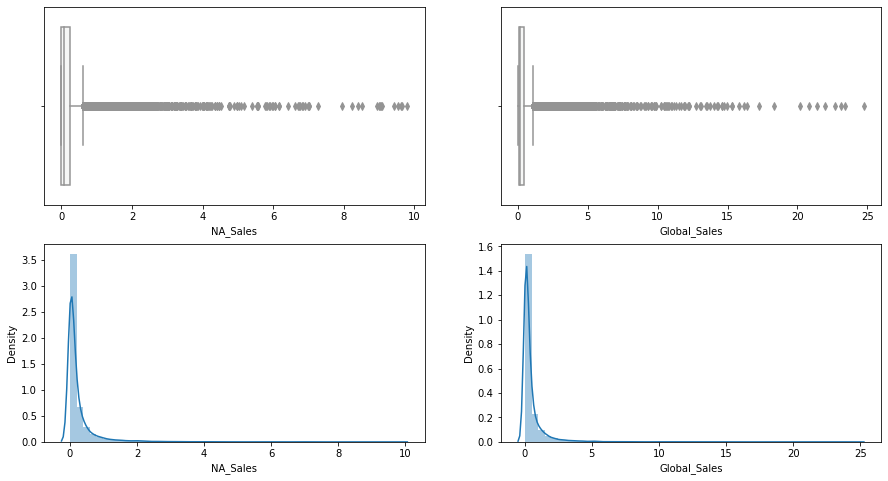

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(videoGameData['NA_Sales'][videoGameData['NA_Sales']<10], palette='PRGn', ax = ax[0, 0])
sns.distplot(videoGameData['NA_Sales'][videoGameData['NA_Sales']<10], ax = ax[1, 0])
sns.boxplot(videoGameData['Global_Sales'][videoGameData['NA_Sales']<10], palette='PRGn', ax = ax[0, 1])
sns.distplot(videoGameData['Global_Sales'][videoGameData['NA_Sales']<10], ax = ax[1, 1])

## Data Preprocessing

In [42]:
videoGameData.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [43]:
videoGameData.dropna(inplace=True)

In [44]:
videoGameData['Year'] = videoGameData['Year'].dt.to_period('Y')

### Categorical Data

In [45]:
videoGameData['Genre'] = videoGameData['Genre'].astype('category')
videoGameData['Platform'] = videoGameData['Platform'].astype('category')
videoGameData['Publisher'] = videoGameData['Publisher'].astype('category')

In [46]:
platformCatDict = dict( enumerate(videoGameData['Platform'].cat.categories ) )
genreCatDict = dict( enumerate(videoGameData['Genre'].cat.categories ) )

In [47]:
videoGameData['Genre_cat'] = videoGameData['Genre'].cat.codes.astype('int')
videoGameData['Platform_cat'] = videoGameData['Platform'].cat.codes.astype('int')
videoGameData['Publisher_cat'] = videoGameData['Publisher'].cat.codes.astype('int')

## Data Exploration and Analysis

Text(0, 0.5, 'Count')

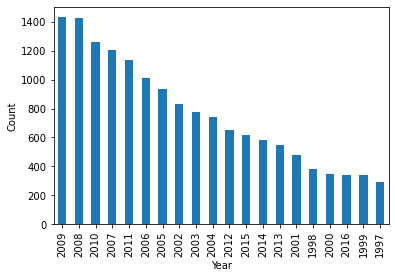

In [46]:
videoGameData['Year'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')

Text(0.5, 0, 'Genre')

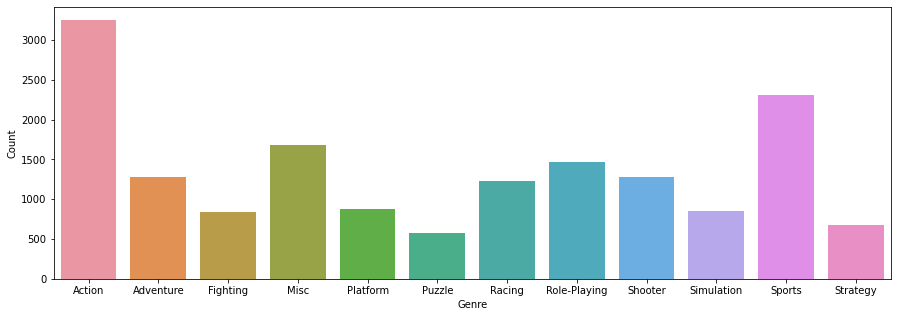

In [47]:
plt.figure(figsize=(15, 5))
sns.countplot(videoGameData['Genre'])
plt.ylabel('Count')
plt.xlabel('Genre')

Text(0.5, 0, 'Platform')

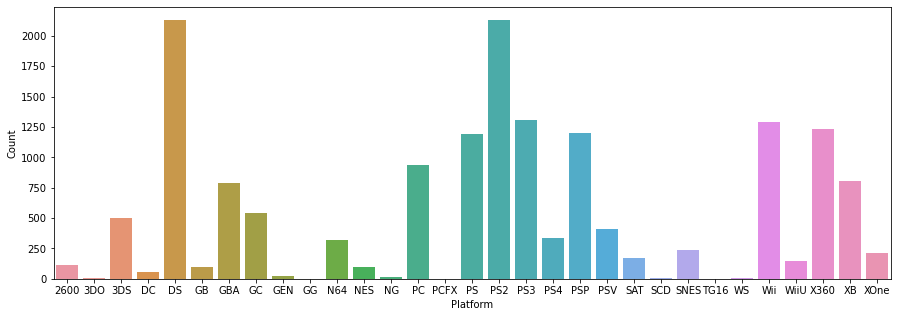

In [48]:
plt.figure(figsize=(15, 5))
sns.countplot(videoGameData['Platform'])
plt.ylabel('Count')
plt.xlabel('Platform')

Text(0, 0.5, 'Global sales')

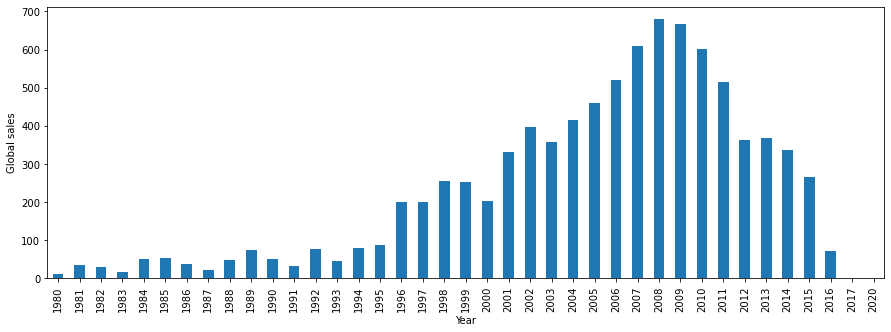

In [75]:
plt.figure(figsize=(15, 5))
videoGameData.groupby(by=['Year'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global sales')

Text(0, 0.5, 'Global sales')

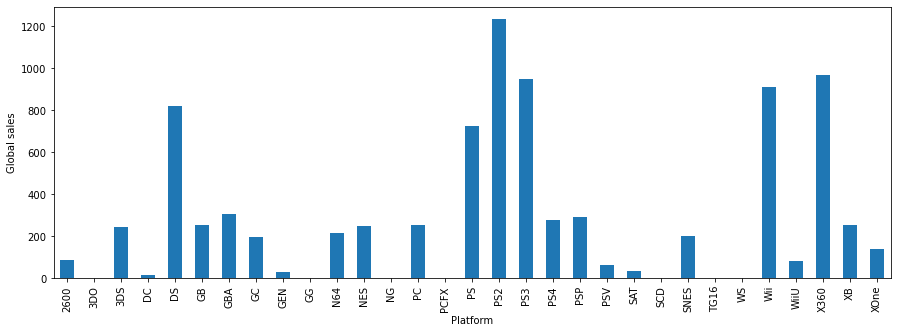

In [74]:
plt.figure(figsize=(15, 5))
videoGameData.groupby(by=['Platform'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global sales')

Text(0, 0.5, 'Global sales')

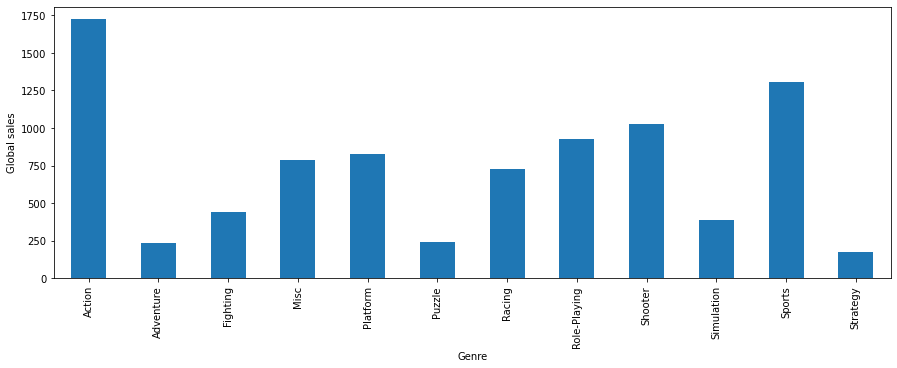

In [73]:
plt.figure(figsize=(15, 5))
videoGameData.groupby(by=['Genre'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global sales')

<AxesSubplot:>

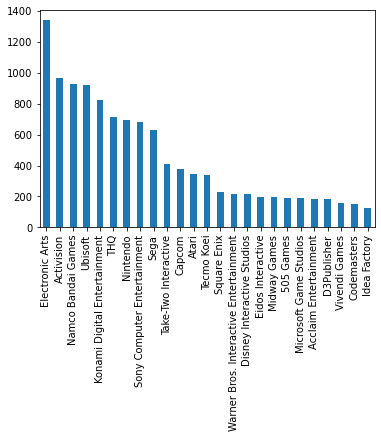

In [52]:
videoGameData['Publisher'].value_counts()[:25].plot(kind='bar')

Text(0, 0.5, 'Total Sales')

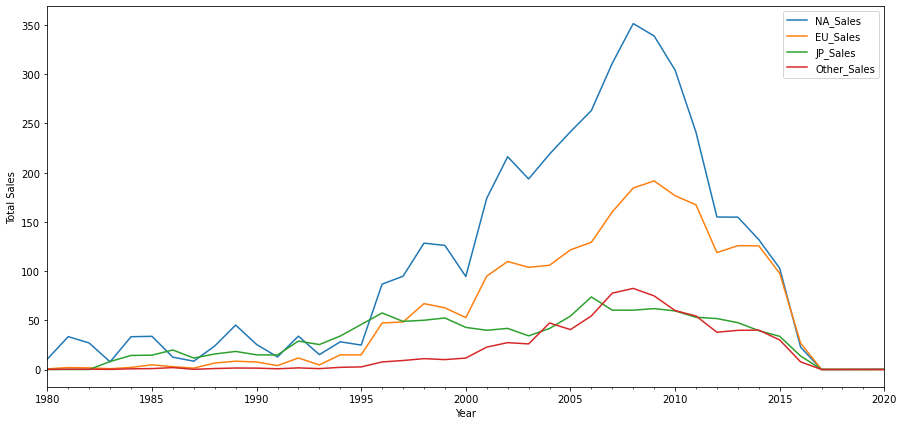

In [72]:
salesPerYear = videoGameData.loc[:, ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()
salesPerYear.plot(figsize=(15, 7))
plt.ylabel('Total Sales')

## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

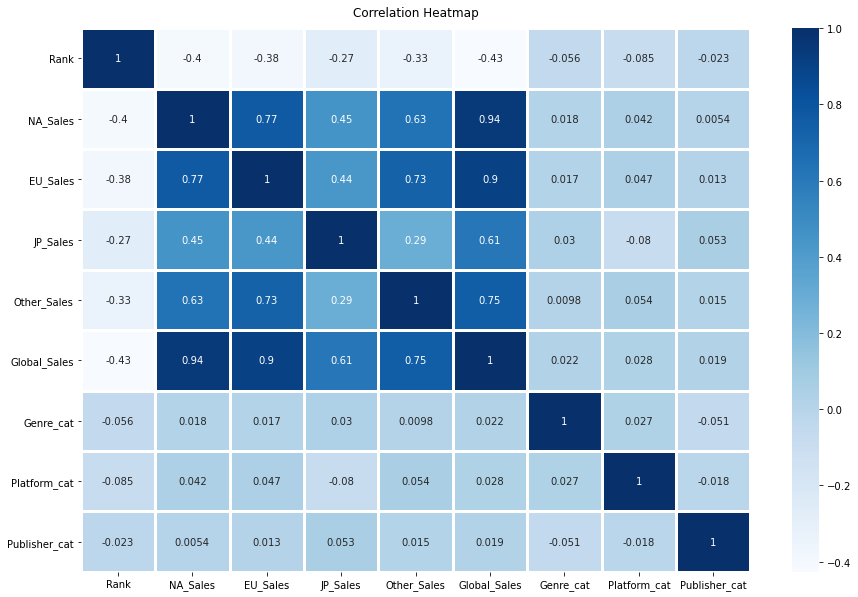

In [54]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(videoGameData.corr(), cmap = "Blues", annot=True, linewidth=3)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [70]:
videoGameData

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_cat,Platform_cat,Publisher_cat
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,26,359
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4,11,359
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6,26,359
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10,26,359
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7,5,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,4,6,269
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,8,7,241
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,6,16,21
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,5,4,8


In [80]:
videoGameData['Year'] = videoGameData['Year'].astype('int')

In [95]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
videoGameData['cluster_label'] = model.fit_predict(videoGameData.loc[:, ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_cat', 'Platform_cat', 'Publisher_cat']])

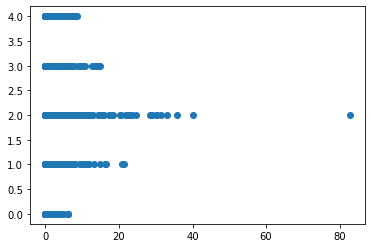

In [96]:
plt.scatter(videoGameData['Global_Sales'], videoGameData['cluster_label'], cmap='viridis')

## Splitting the dataset


In [111]:
from sklearn.model_selection import train_test_split
X = videoGameData[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_cat', 'Platform_cat', 'Publisher_cat']]
y = videoGameData['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## K-Nearest Neighbors Regression

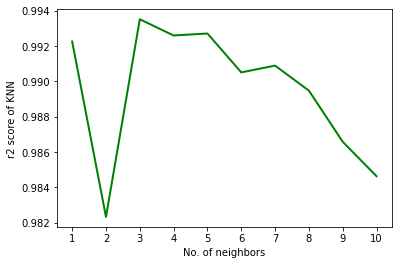

In [112]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(X_train,y_train)
    y_pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test, y_pred))
plt.plot(knnRange, scores_list, linewidth=2, color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()    

In [114]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=3)
regressor_knn.fit(X_train, y_train)
y_pred = regressor_knn.predict(X_test)
r2_knn = r2_score(y_test, y_pred)
print(r2_knn)

0.9935123399256577


## Decision Tree Regression

In [115]:
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [117]:
y_pred = regressor_Tree.predict(X_test)

In [118]:
r2_score(y_test,y_pred)

0.9981553245798216

## Random Forest Regression

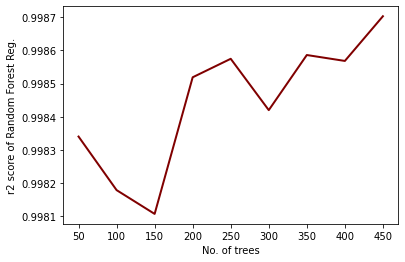

In [119]:
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i, random_state=0)
    regressor_Forest.fit(X_train, y_train)
    y_pred = regressor_Forest.predict(X_test)
    scores_list.append(r2_score(y_test, y_pred))
plt.plot(forestRange, scores_list, linewidth=2, color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()    

In [120]:
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(X_train, y_train)
y_pred = regressor_Forest.predict(X_test)
r2_forest = r2_score(y_test, y_pred)
print(r2_forest)

0.9981789491977522
